# **Time Series Forecasting**

### **Import necessary libraries**

In [1]:
!pip install pmdarima
import pandas as pd
import pmdarima as pm
from pmdarima.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 7.5 MB/s eta 0:00:00


### **Load time series data**

In [2]:
data = pd.read_csv('dc.csv')

### **Visualize Dataset**

In [3]:
data.head()

,Unnamed: 0,open_SAR,open_USD,high_SAR,high_USD,low_SAR,low_USD,close_SAR,close_USD,volume
0,2021-01-30,128437.248512,34246.28,131012.723200,34933.00,123106.880000,32825.00,128333.212416,34218.54,43072
1,2021-01-29,125144.022272,33368.18,144510.037760,38531.90,119695.516160,31915.40,128459.450880,34252.20,231827
2,2021-01-28,113870.357376,30362.19,126703.438592,33783.98,111919.811840,29842.10,125131.570944,33364.86,92621
3,2021-01-27,121753.023104,32464.01,122102.860416,32557.29,109668.146688,29241.72,113885.208960,30366.15,95911
4,2021-01-26,120966.114176,32254.19,123470.218752,32921.88,115652.472448,30837.37,121767.124608,32467.77,84972


### **Format Dataset**

In [4]:
data = data.rename(columns={'Unnamed: 0': 'Date'})
data = data[['Date', 'close_SAR', 'close_USD']]
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

### **Split the data into a training set and a test set**

In [5]:
train_data, test_data = train_test_split(data, train_size=0.8)

### **Fit an AutoARIMA model to the 'close_SAR' column**

In [6]:
autoarima_model_sar = pm.auto_arima(train_data['close_SAR'], seasonal=True, m=12, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=inf, Time=7.12 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=14863.462, Time=0.03 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=14810.269, Time=0.69 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=14794.747, Time=1.20 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=14801.568, Time=0.55 sec
 ARIMA(0,2,1)(1,0,1)[12]             : AIC=14795.480, Time=3.73 sec
 ARIMA(0,2,1)(0,0,2)[12]             : AIC=14792.574, Time=6.47 sec
 ARIMA(0,2,1)(1,0,2)[12]             : AIC=inf, Time=16.83 sec
 ARIMA(0,2,0)(0,0,2)[12]             : AIC=14852.965, Time=1.64 sec
 ARIMA(1,2,1)(0,0,2)[12]             : AIC=inf, Time=7.09 sec
 ARIMA(0,2,2)(0,0,2)[12]             : AIC=14700.939, Time=5.61 sec
 ARIMA(0,2,2)(0,0,1)[12]             : AIC=14705.291, Time=1.62 sec
 ARIMA(0,2,2)(1,0,2)[12]             : AIC=14688.438, Time=11.51 sec
 ARIMA(0,2,2)(1,0,1)[12]             : AIC=14705.449, Time=4.20 sec
 ARIMA(0,2,2)(2,0,2)[

### **Print the best model's summary**

In [7]:
print("AutoARIMA Model for close_SAR:\n")
autoarima_model_sar.summary()

AutoARIMA Model for close_SAR:



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  800
Model:             SARIMAX(0, 2, 2)x(1, 0, 2, 12)   Log Likelihood               -7338.219
Date:                            Mon, 02 Oct 2023   AIC                          14688.438
Time:                                    21:38:37   BIC                          14716.530
Sample:                                         0   HQIC                         14699.231
                                            - 800                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5237      0.007    -72.930      0.000      -0.538      -0.510
ma.L2         -0.2719      0.004    -61.389      0.000      -0.281      -0.263
ar.S.L12       0.7263      0.098      7.420      0.000       0.534       0.918
ma.S.L12      -0.6811      0.101     -6.744      0.000      -0.879      -0.483
ma.S.L24      -0.0996      0.011     -9.282      0.000      -0.121      -0.079
sigma2      5.471e+06    6.7e+04     81.708      0.000    5.34e+06     5.6e+06
===================================================================================
Ljung-Box (L1) (Q):                  13.37   Jarque-Bera (JB):             51733.22
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.16   Skew:                            -2.71
Prob(H) (two-sided):                  0.00   Kurtosis:                        42.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### **Fit an AutoARIMA model to the 'close_USD' column**

In [8]:
autoarima_model_usd = pm.auto_arima(train_data['close_USD'], seasonal=True, m=12, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=inf, Time=4.54 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=12753.770, Time=0.03 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=12599.066, Time=0.32 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=inf, Time=0.80 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=12611.263, Time=0.08 sec
 ARIMA(1,2,0)(2,0,0)[12]             : AIC=12591.981, Time=0.47 sec
 ARIMA(1,2,0)(2,0,1)[12]             : AIC=12584.914, Time=3.14 sec
 ARIMA(1,2,0)(1,0,1)[12]             : AIC=12597.416, Time=1.53 sec
 ARIMA(1,2,0)(2,0,2)[12]             : AIC=12586.860, Time=4.77 sec
 ARIMA(1,2,0)(1,0,2)[12]             : AIC=12586.407, Time=9.85 sec
 ARIMA(0,2,0)(2,0,1)[12]             : AIC=12725.365, Time=16.20 sec
 ARIMA(2,2,0)(2,0,1)[12]             : AIC=12546.573, Time=1.88 sec
 ARIMA(2,2,0)(1,0,1)[12]             : AIC=12563.890, Time=0.55 sec
 ARIMA(2,2,0)(2,0,0)[12]             : AIC=12555.519, Time=0.60 sec
 ARIMA(2,2,0)(2,

### **Print the best model's summary**

In [9]:
print("\nAutoARIMA Model for close_USD:")
autoarima_model_usd.summary()


AutoARIMA Model for close_USD:


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  800
Model:             SARIMAX(3, 2, 3)x(2, 0, [1], 12)   Log Likelihood               -6127.654
Date:                              Mon, 02 Oct 2023   AIC                          12275.308
Time:                                      21:47:04   BIC                          12322.129
Sample:                                           0   HQIC                         12293.297
                                              - 800                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5594      0.070     -8.018      0.000      -0.696      -0.423
ar.L2          0.0761      0.064      1.182      0.237      -0.050       0.202
ar.L3         -0.1870      0.016    -11.703      0.000      -0.218      -0.156
ma.L1         -0.2839      0.074     -3.853      0.000      -0.428      -0.139
ma.L2         -0.7616      0.031    -24.343      0.000      -0.823      -0.700
ma.L3          0.0625      0.074      0.850      0.395      -0.082       0.207
ar.S.L12       0.6577      0.093      7.058      0.000       0.475       0.840
ar.S.L24      -0.2278      0.018    -12.415      0.000      -0.264      -0.192
ma.S.L12      -0.5363      0.099     -5.405      0.000      -0.731      -0.342
sigma2       2.27e+05   4186.677     54.219      0.000    2.19e+05    2.35e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.58   Jarque-Bera (JB):              9058.73
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               0.23   Skew:                            -0.85
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### **Make predictions on the test set for 'close_SAR' and 'close_USD'**

In [10]:
forecast_sar, conf_int_sar = autoarima_model_sar.predict(n_periods=len(test_data), return_conf_int=True)
forecast_usd, conf_int_usd = autoarima_model_usd.predict(n_periods=len(test_data), return_conf_int=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


### **Print the Mean Absolute Error (MAE) for 'close_SAR' and 'close_USD'**

In [11]:
mae_sar = mean_absolute_error(test_data['close_SAR'], forecast_sar)
mae_usd = mean_absolute_error(test_data['close_USD'], forecast_usd)

print(f"\nMean Absolute Error (MAE) for close_SAR: {mae_sar}")
print(f"Mean Absolute Error (MAE) for close_USD: {mae_usd}")


Mean Absolute Error (MAE) for close_SAR: 22353.078505640897
Mean Absolute Error (MAE) for close_USD: 3381.532338290212


### **Visualize the forecasts and confidence intervals for 'close_SAR'**

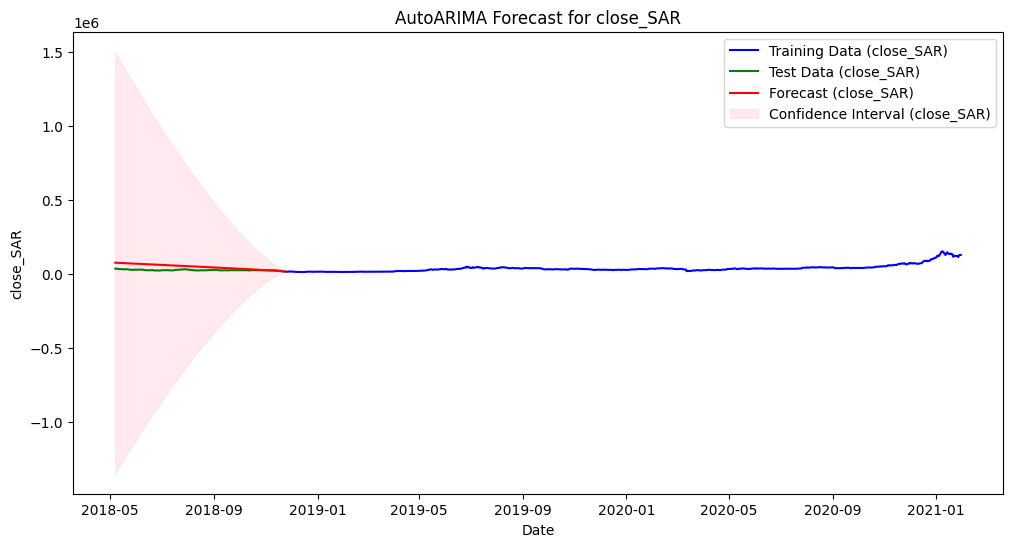

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['close_SAR'], label='Training Data (close_SAR)', color='blue')
plt.plot(test_data.index, test_data['close_SAR'], label='Test Data (close_SAR)', color='green')
plt.plot(test_data.index, forecast_sar, label='Forecast (close_SAR)', color='red')
plt.fill_between(test_data.index, conf_int_sar[:, 0], conf_int_sar[:, 1], color='pink', alpha=0.3, label='Confidence Interval (close_SAR)')
plt.legend()
plt.title('AutoARIMA Forecast for close_SAR')
plt.xlabel('Date')
plt.ylabel('close_SAR')
plt.show()

### **Visualize the forecasts and confidence intervals for 'close_USD'**

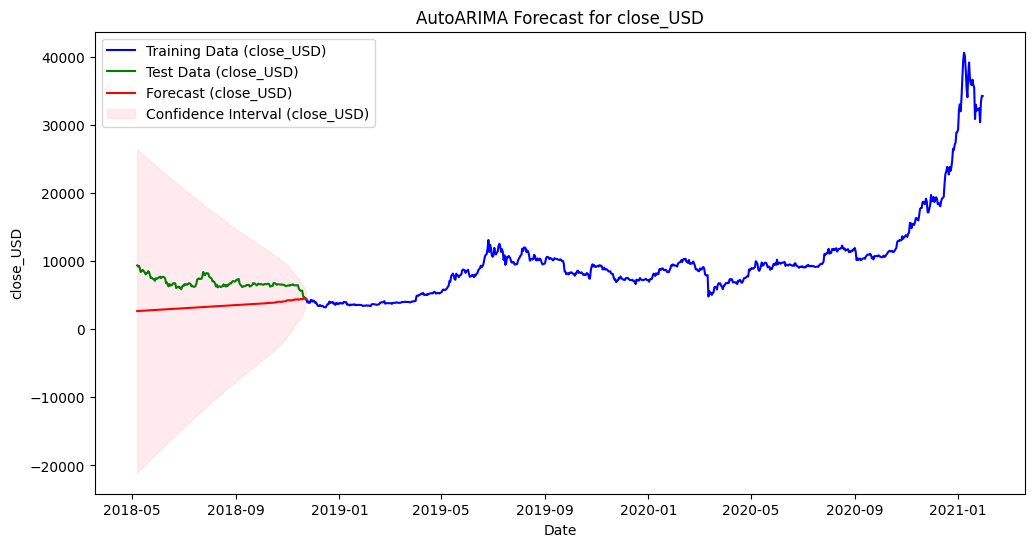

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['close_USD'], label='Training Data (close_USD)', color='blue')
plt.plot(test_data.index, test_data['close_USD'], label='Test Data (close_USD)', color='green')
plt.plot(test_data.index, forecast_usd, label='Forecast (close_USD)', color='red')
plt.fill_between(test_data.index, conf_int_usd[:, 0], conf_int_usd[:, 1], color='pink', alpha=0.3, label='Confidence Interval (close_USD)')
plt.legend()
plt.title('AutoARIMA Forecast for close_USD')
plt.xlabel('Date')
plt.ylabel('close_USD')
plt.show()